<a href="https://colab.research.google.com/github/K-2315/WiDS---visheshjain0122-WiDS---Exploring-Optimisation-Algorithms-and-Applications/blob/main/WIDS%20ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Minimum value of z: 0.0
Minimizing values: x1 = 2.0, x2 = 4.0
Tolerance | Iterations | Function Value | Minimiser X1 | Minimiser X2 
[[1.00000000e-01 5.00000000e+00 2.03367068e-06 1.99857393e+00
  3.99429776e+00]
 [1.00000000e-02 0.00000000e+00 2.03367068e-06 1.99857393e+00
  3.99429776e+00]
 [1.00000000e-03 1.00000000e+00 8.27163188e-11 2.00000000e+00
  3.99999797e+00]
 [1.00000000e-04 1.00000000e+00 3.15544362e-28 2.00000000e+00
  4.00000000e+00]
 [1.00000000e-05 0.00000000e+00 3.15544362e-28 2.00000000e+00
  4.00000000e+00]
 [1.00000000e-06 0.00000000e+00 3.15544362e-28 2.00000000e+00
  4.00000000e+00]
 [1.00000000e-07 0.00000000e+00 3.15544362e-28 2.00000000e+00
  4.00000000e+00]
 [1.00000000e-08 0.00000000e+00 3.15544362e-28 2.00000000e+00
  4.00000000e+00]
 [1.00000000e-09 0.00000000e+00 3.15544362e-28 2.00000000e+00
  4.00000000e+00]
 [1.00000000e-10 0.00000000e+00 3.15544362e-28 2.00000000e+00
  4.00000000e+00]
 [1.00000000e-11 0.00000000e+00 3.15544362e-28 2.00000000e+00
  4.0

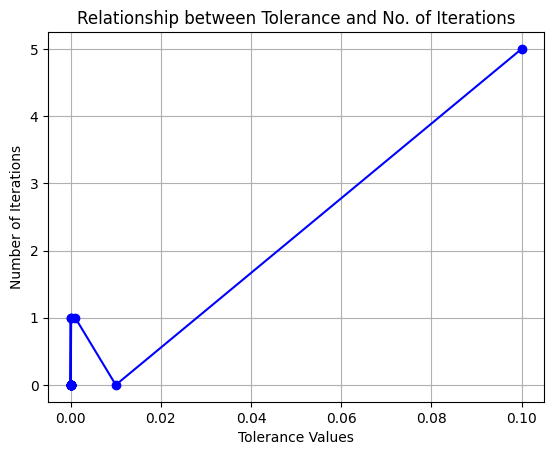

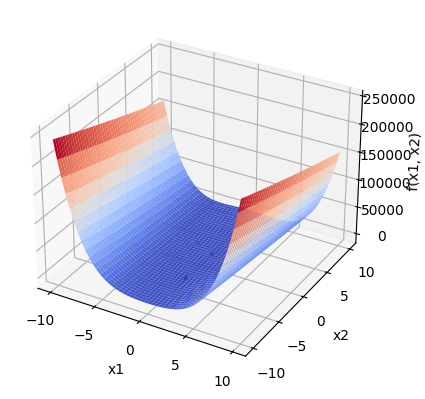

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x1, x2 = sp.symbols('x1 x2')

def z(x1, x2):
    return (2 - x1)**2 + 20 * ((x2 - (x1**2))**2)

dz_dx1 = sp.diff(z(x1, x2), x1)
dz_dx2 = sp.diff(z(x1, x2), x2)
d2z_dx12 = sp.diff(dz_dx1, x1)
d2z_dx22 = sp.diff(dz_dx2, x2)
d2z_dx1x2 = sp.diff(dz_dx1, x2)

dz_dx1_func = sp.lambdify((x1, x2), dz_dx1, 'numpy')
dz_dx2_func = sp.lambdify((x1, x2), dz_dx2, 'numpy')
d2z_dx12_func = sp.lambdify((x1, x2), d2z_dx12, 'numpy')
d2z_dx22_func = sp.lambdify((x1, x2), d2z_dx22, 'numpy')
d2z_dx1x2_func = sp.lambdify((x1, x2), d2z_dx1x2, 'numpy')

def grad(x1, x2):
    return np.array([dz_dx1_func(x1, x2), dz_dx2_func(x1, x2)])

def hessian(x1, x2):
    return np.array([[d2z_dx12_func(x1, x2), d2z_dx1x2_func(x1, x2)],
                     [d2z_dx1x2_func(x1, x2), d2z_dx22_func(x1, x2)]])

def norm(x1, x2):
    return np.linalg.norm(grad(x1, x2))

def tolerance(p):
    return 10**(-p)

def algo(cp_x1, cp_x2):
    tablelist = []
    history = []
    Tvals = []
    Iterations = []

    for i in range(1, 21):
        Tlevel = tolerance(i)
        count = 0
        while norm(cp_x1, cp_x2) > Tlevel:
            g = grad(cp_x1, cp_x2)
            h = hessian(cp_x1, cp_x2)
            if np.linalg.det(h) == 0:
                print("Hessian is singular. Exiting iteration.")
                break

            h_inv = np.linalg.inv(h)
            step = np.dot(h_inv, g)
            cp_x1 -= step[0]
            cp_x2 -= step[1]
            count += 1
            history.append((cp_x1, cp_x2, z(cp_x1, cp_x2)))

        tablelist.append((Tlevel, count, z(cp_x1, cp_x2), cp_x1, cp_x2))
        Tvals.append(Tlevel)
        Iterations.append(count)

    table_array = np.array(tablelist)
    history_array = np.array(history)

    return cp_x1, cp_x2, z(cp_x1, cp_x2), history_array, Tvals, Iterations, table_array

cp_x1, cp_x2 = -1.5, 1.5
min_x1, min_x2, min_z, history, Tvalues, Iterations1, t = algo(cp_x1, cp_x2)
print(f"Minimum value of z: {min_z}")
print(f"Minimizing values: x1 = {min_x1}, x2 = {min_x2}")
print("Tolerance | Iterations | Function Value | Minimiser X1 | Minimiser X2 ")
print(t)
print(Tvalues)
print(Iterations1)

plt.plot(Tvalues, Iterations1, marker='o', linestyle='-', color='b', label='Line Plot')
plt.xlabel('Tolerance Values')
plt.ylabel('Number of Iterations')
plt.title('Relationship between Tolerance and No. of Iterations')
plt.grid(True)
plt.show()

x1_range = np.arange(-10,10,0.1)
x2_range = np.arange(-10,10,0.1)
X1,X2=np.meshgrid(x1_range,x2_range)
Z = z(X1,X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='coolwarm')
x_history, y_history, z_history = zip(*history)
ax.scatter(x_history, y_history, z_history, c='k', marker='.', label='Gradient Descent Path')
ax.scatter(min_x1, min_x2, min_z, c='k', s=50, label='Minimum Point')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
plt.show()




The table for
Tolerance Iteration Minima MinimiserX1 MinimiserX2
 [[1.00000000e-01 1.01440000e+04 3.55641500e-02 1.81203122e+00
  3.27864167e+00]
 [1.00000000e-02 1.73410000e+04 4.19195691e-04 1.97958310e+00
  3.91826491e+00]
 [1.00000000e-03 1.90950000e+04 4.26466128e-06 1.99794059e+00
  3.99171813e+00]
 [1.00000000e-04 1.92890000e+04 4.27193259e-08 1.99979388e+00
  3.99917073e+00]
 [1.00000000e-05 1.93080000e+04 4.27317494e-10 1.99997939e+00
  3.99991706e+00]
 [1.00000000e-06 1.93110000e+04 4.27269456e-12 1.99999794e+00
  3.99999171e+00]
 [1.00000000e-07 1.93100000e+04 4.27336667e-14 1.99999979e+00
  3.99999917e+00]
 [1.00000000e-08 1.93110000e+04 4.27303230e-16 1.99999998e+00
  3.99999992e+00]
 [1.00000000e-09 1.93110000e+04 4.27271682e-18 2.00000000e+00
  3.99999999e+00]
 [1.00000000e-10 1.93110000e+04 4.27302156e-20 2.00000000e+00
  4.00000000e+00]] 

Minimum value of function =  4.273021558069527e-20
x1 min =  1.999999999793856
x2 min =  3.9999999991705777
The table for
Tolerance

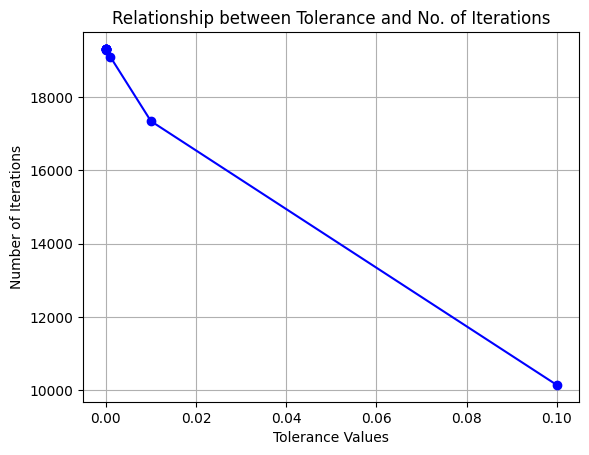

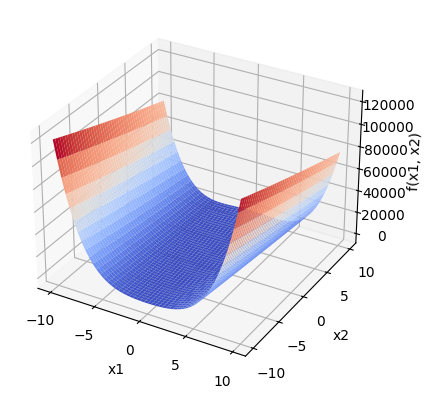

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def z(x1,x2):
    return (2-x1)**2 + 10*((x2-(x1**2))**2)

def grad_x1(x1,x2):
    return -2*(2-x1) - 40*(x2-(x1**2))*x1

def grad_x2(x1,x2):
    return 20*(x2-(x1**2))

def norm(x1,x2):
    return np.sqrt(grad_x1(x1,x2)**2 + grad_x2(x1,x2)**2)

def tolerance(p):
    return 10**(-p)

def algo(cp_x1,cp_x2,l_r):
    tablelist=[]
    Tvalues=[]
    Iterations=[]
    for i in range(1,11):
        history=[]
        norm1 = norm(cp_x1,cp_x2)
        Tlevel = tolerance(i)
        count = 0
        while(norm1 > Tlevel):
            history.append((cp_x1,cp_x2,z(cp_x1,cp_x2)))
            cp_x1 = cp_x1 - l_r*grad_x1(cp_x1,cp_x2)
            cp_x2 = cp_x2 - l_r*grad_x2(cp_x1,cp_x2)
            count = count + 1
            norm1 = norm(cp_x1,cp_x2)

        tablelist.append((10**(-i),count,z(cp_x1,cp_x2), cp_x1, cp_x2))
        table_array=np.array(tablelist)
        history_array=np.array(history)
        Tvalues.append(10**(-i))
        Iterations.append(count)
    return cp_x1, cp_x2, z(cp_x1,cp_x2), table_array,history_array, history, Tvalues, Iterations



cp_x1, cp_x2 = -1.5,1.5
l_r = 0.001
min_x1,min_x2,fmin,t,history1,history2, Tvals,Iterations1=algo(cp_x1,cp_x2,l_r)
print("Minimum value of function = ",fmin)
print("x1 min = ",min_x1)
print("x2 min = ",min_x2)
print("The table for\nTolerance Iteration Minima MinimiserX1 MinimiserX2\n",t,"\n")
print("The History of Point is\n",history1)
print(Tvals)
print(Iterations1)

plt.plot(Tvals, Iterations1, marker='o', linestyle='-', color='b', label='Line Plot')
plt.xlabel('Tolerance Values')
plt.ylabel('Number of Iterations')
plt.title('Relationship between Tolerance and No. of Iterations')
plt.grid(True)
plt.show()

x1_range = np.arange(-10,10,0.1)
x2_range = np.arange(-10,10,0.1)
X1,X2=np.meshgrid(x1_range,x2_range)
Z = z(X1,X2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='coolwarm')
x_history, y_history, z_history = zip(*history2)
ax.scatter(x_history, y_history, z_history, c='k', marker='.', label='Gradient Descent Path')
ax.scatter(min_x1, min_x2, fmin, c='g', s=50, label='Minimum Point')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
plt.show()